# Monte Carlo Simulation on Real Stock Data

## Overview
In this project, we will perform a **Monte Carlo simulation** using historical stock data to explore **possible future stock price paths**.  
Monte Carlo simulation is a powerful method used in quantitative finance to **model uncertainty and risk** using random sampling.

## What Did I Learn
- How to **fetch historical stock data** using Python (`yfinance` library)
- How to **calculate daily returns and volatility** from real data
- How to implement **Monte Carlo simulation** for stock price forecasting
- How to **visualize multiple simulated price paths** using Matplotlib
- How to **analyze potential outcomes**, including average, minimum, and maximum future prices
- How to **document and organize a quant project** for a professional portfolio

## Project Goal
Simulate **many possible future price trajectories** for a stock based on its historical behavior, and use these simulations to **understand potential outcomes and risks**.


/tmp/ipython-input-735418305.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-735418305.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(data['Close'].iloc[-1])  # last known stock price


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.261042  24.729265  23.821666  24.718169  212818400
2015-01-05  23.577576  24.110152  23.391175  24.030265  257142000
2015-01-06  23.579790  23.839420  23.218081  23.641924  263188400
2015-01-07  23.910429  24.010286  23.677426  23.788380  160423600
2015-01-08  24.829124  24.886821  24.121242  24.238854  237458000
Mean daily return: 0.0010878563895280393
Daily volatility: 0.017929215183572135


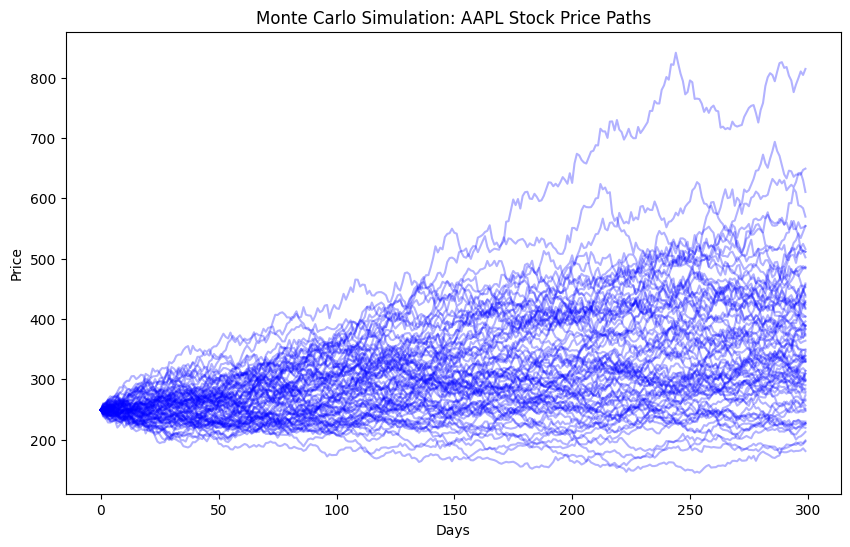

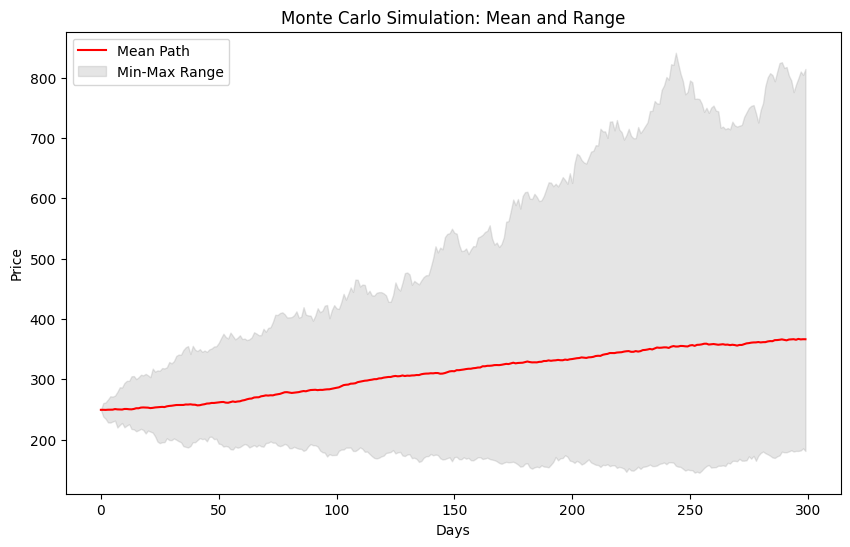

In [1]:

!pip install yfinance --quiet


import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2025-01-01")


data.head()
print(data.head())


data['daily_return'] = data['Close'].pct_change()
daily_returns = data['daily_return'].dropna()


mu = float(daily_returns.mean())
sigma = float(daily_returns.std())

print("Mean daily return:", mu)
print("Daily volatility:", sigma)


S0 = float(data['Close'].iloc[-1])  # last known stock price
T = 300  # number of trading days to simulate (~1 year)
N = 75   # number of simulated paths


simulations = np.zeros((T, N))


for i in range(N):
    prices = np.zeros(T)
    prices[0] = S0
    for t in range(1, T):

        prices[t] = prices[t-1] * np.exp((mu - 0.5 * sigma**2) + sigma * np.random.normal())
    simulations[:, i] = prices


plt.figure(figsize=(10,6))
for i in range(N):
    plt.plot(simulations[:, i], color='blue', alpha=0.3)
plt.title("Monte Carlo Simulation: AAPL Stock Price Paths")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


mean_path = simulations.mean(axis=1)
min_path = simulations.min(axis=1)
max_path = simulations.max(axis=1)

plt.figure(figsize=(10,6))
plt.plot(mean_path, color='red', label='Mean Path')
plt.fill_between(range(T), min_path, max_path, color='gray', alpha=0.2, label='Min-Max Range')
plt.title("Monte Carlo Simulation: Mean and Range")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()
